# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [6]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar a base de dados
df = pd.read_csv('C:/Users/DELL/Documents/ebac/portifolios/ALUGUEL_MOD12.csv', sep=';')

# Selecionar a variável Metragem para X e Valor_Aluguel para Y
X = df[['Metragem']].values
y = df['Valor_Aluguel'].values

# Mostrar informações sobre as variáveis selecionadas
print("\nFormato de X:", X.shape)
print("Formato de y:", y.shape)
print("\nExemplo dos 5 primeiros valores de X:")
print(X[:5])
print("\nExemplo dos 5 primeiros valores de y:")
print(y[:5])


Formato de X: (7203, 1)
Formato de y: (7203,)

Exemplo dos 5 primeiros valores de X:
[[48]
 [50]
 [40]
 [45]
 [30]]

Exemplo dos 5 primeiros valores de y:
[480 500 500 500 500]


# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [2]:
# Criar características polinomiais com degree=2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Visualizar a transformação (opcional)
print("Forma original:", X.shape)
print("Após transformação polinomial:", X_poly.shape)

Forma original: (7203, 1)
Após transformação polinomial: (7203, 3)


# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [3]:
# Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

Degree=2 - RMSE: 2022.24
Degree=2 - R²: 0.57


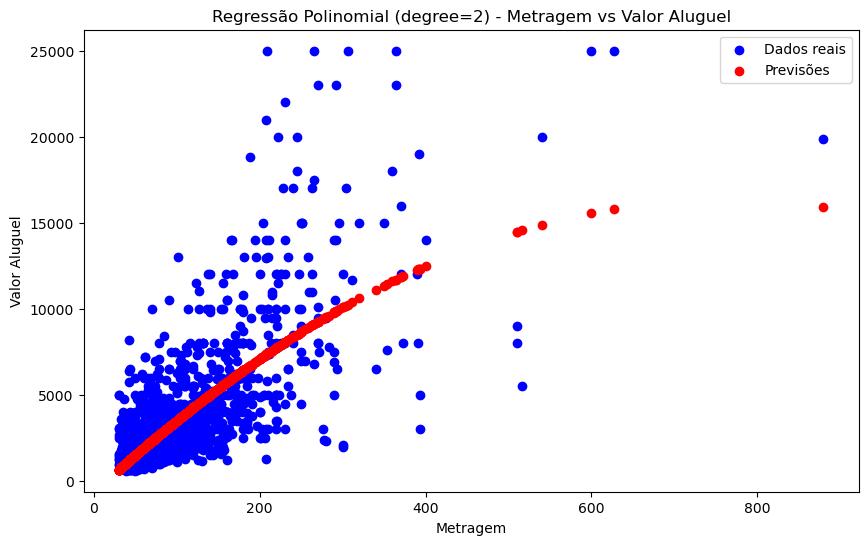

In [4]:
# Fazer previsões para o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Degree=2 - RMSE: {rmse:.2f}")
print(f"Degree=2 - R²: {r2:.2f}")

# Plotar a regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, color='blue', label='Dados reais')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Previsões')
plt.title('Regressão Polinomial (degree=2) - Metragem vs Valor Aluguel')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.


Degree=4 - RMSE: 2024.88
Degree=4 - R²: 0.57


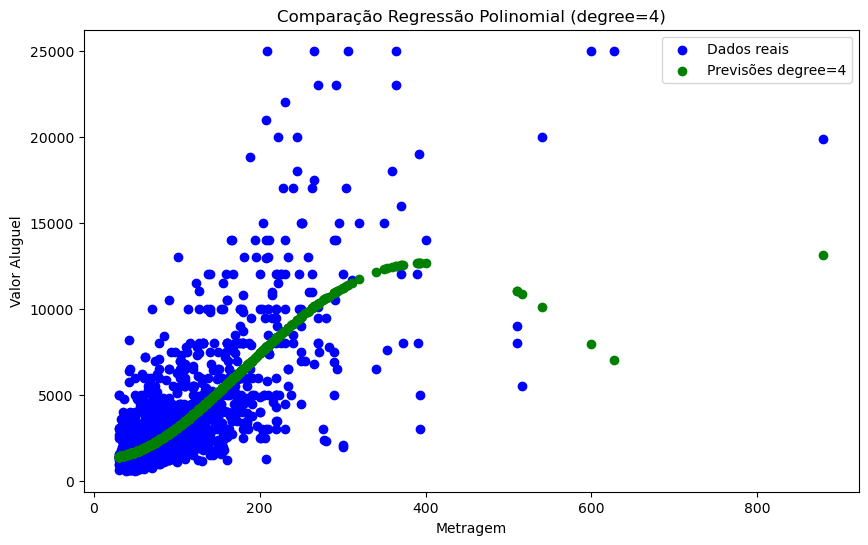

In [5]:
# Processamento com degree=4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X)

# Divisão treino/teste
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_poly4, y, test_size=0.3, random_state=42)

# Treinar modelo
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

# Previsões e avaliação
y_pred4 = model4.predict(X_test4)

mse4 = mean_squared_error(y_test4, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test4, y_pred4)

print(f"\nDegree=4 - RMSE: {rmse4:.2f}")
print(f"Degree=4 - R²: {r2_4:.2f}")

# Plotar comparação
plt.figure(figsize=(10, 6))
plt.scatter(X_test4[:, 1], y_test4, color='blue', label='Dados reais')
plt.scatter(X_test4[:, 1], y_pred4, color='green', label='Previsões degree=4')
plt.title('Comparação Regressão Polinomial (degree=4)')
plt.xlabel('Metragem')
plt.ylabel('Valor Aluguel')
plt.legend()
plt.show()

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

Elastic Net, Ridge e Lasso são técnicas de regularização para modelos de regressão linear:

Ridge (L2): Adiciona uma penalidade igual ao quadrado dos coeficientes (λ‖w‖²). Reduz a magnitude dos coeficientes sem eliminá-los, sendo útil quando muitas variáveis têm influência moderada.

Lasso (L1): Adiciona uma penalidade igual ao valor absoluto dos coeficientes (λ‖w‖). Pode reduzir completamente alguns coeficientes a zero, realizando seleção de variáveis.

Elastic Net: Combina as penalidades L1 e L2, com dois parâmetros de ajuste. Útil quando há múltiplas features correlacionadas ou quando o número de features é maior que o número de observações.

A principal diferença está na natureza da penalização: Ridge apenas reduz coeficientes, Lasso pode zerar coeficientes (seleção de features), e Elastic Net oferece um meio-termo entre os dois, combinando suas vantagens.

